## Imports


In [6]:
import rasterio
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import glob
import os

## Helper Functions

In [2]:
def load_landsat_band(band: bytes) -> np.ndarray:
    # Load Landsat bands from input directory
    with rasterio.open(band) as loaded_band:
        return loaded_band.read(1)

## Fetch Bands from IPFS

## Load the bands into a numpy array

In [3]:
pattern = 'LC09_L1TP_015033_20221015_20221015_02_T1_B*.TIF'
input_dir = os.path.join(os.getcwd(), "inputs")
red_band_4, nir_band_5 = load_landsat_bands(pattern, input_dir)

## Calculate NDVI

In [7]:
eps = 0.0001 # Avoid divide by zero errors
ndvi = (nir_band_5 - red_band_4) / (nir_band_5 + red_band_4 + eps)

## Plot NDVI

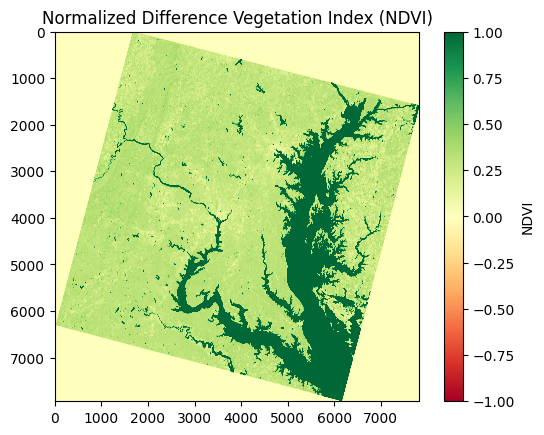

In [8]:
# Set min and max values for better color differentiation
ndvi_min, ndvi_max = -1, 1

# Create a custom color map
cmap = plt.cm.RdYlGn
norm = mcolors.Normalize(vmin=ndvi_min, vmax=ndvi_max)

# Plot NDVI image
plt.imshow(ndvi, cmap=cmap, norm=norm)
plt.colorbar(label='NDVI', cmap=cmap, norm=norm)
plt.title('Normalized Difference Vegetation Index (NDVI)')
plt.show()